In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
## Draw 100 random samples from a uniform distribution
## btwn 0 and 1
x1 = np.random.uniform(0, 1, 100)
x2 = 0.5 * x1 + (np.random.uniform(0, 1, 100) / 10)
y = 2 + (2 * x1) + (0.3 * x2) + (np.random.uniform(0, 1, 100))
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

(array([11., 14., 11., 11.,  9.,  8., 10.,  9.,  6., 11.]),
 array([0.00358653, 0.10314189, 0.20269725, 0.30225261, 0.40180797,
        0.50136333, 0.60091869, 0.70047405, 0.80002941, 0.89958478,
        0.99914014]),
 <BarContainer object of 10 artists>)

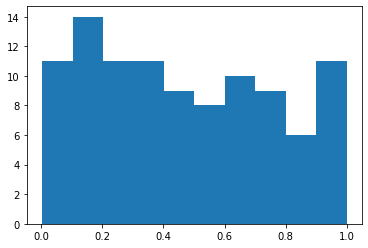

In [19]:
plt.hist(x1)

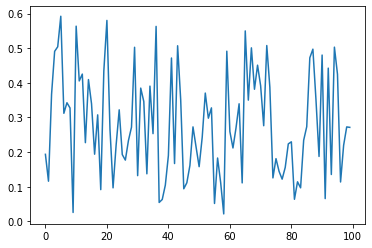

In [20]:
plt.plot(x2)

# Q1
Write out the form of the linear model. Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 $$

In [32]:
## fit OLS model
X = np.column_stack((x1,x2))
## add col of ones
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.45e-37
Time:                        16:29:04   Log-Likelihood:                -22.262
No. Observations:                 100   AIC:                             50.52
Df Residuals:                      97   BIC:                             58.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4268      0.077     31.642      0.000       2.275       2.579
x1             1.8208      0.517      3.521      0.001       0.794       2.847
x2             0.8314      1.019      0.815      0.417      -1.192       2.855
==============================================================================
Omnibus:                       30.667   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.837
Skew:                          -0.047   Prob(JB):                       0.0540
Kurtosis:                       1.820   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3 
Now fit a least squares regression to predict y using only x1. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?

In [33]:
## fit OLS model
X1 = sm.add_constant(x1)
model = sm.OLS(y, X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     461.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           7.45e-39
Time:                        16:31:19   Log-Likelihood:                -22.604
No. Observations:                 100   AIC:                             49.21
Df Residuals:                      98   BIC:                             54.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4682      0.057     43.046      0.000       2.354       2.582
x1             2.2339      0.104     21.484      0.000       2.028       2.440
==============================================================================
Omnibus:                       34.461   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.090
Skew:                          -0.048   Prob(JB):                       0.0476
Kurtosis:                       1.795   Cond. No.                         4.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q4
Question 4 (2 points)
Now fit a least squares regression to predict y using only x2. Comment on your results. Can you
reject the null hypothesis H0 : β1 = 0?


In [34]:
## fit OLS model
X2 = sm.add_constant(x2)
model = sm.OLS(y, X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     401.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.96e-36
Time:                        16:31:45   Log-Likelihood:                -28.275
No. Observations:                 100   AIC:                             60.55
Df Residuals:                      98   BIC:                             65.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2860      0.069     33.065      0.000       2.149       2.423
x1             4.3470      0.217     20.039      0.000       3.917       4.778
==============================================================================
Omnibus:                        6.942   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                2.931
Skew:                          -0.000   Prob(JB):                        0.231
Kurtosis:                       2.161   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q6
*What does VIF do? Describe how you may apply VIF to this problem.*

---

**Variance inflation factors (VIF) help detect multicollinearity between predictor variables. **

VIF of a coefficient B_J is the ratio, or times factor, by which the variance of B_J is "inflated"/increased by the existence of correlation among the other predictor variables.

THe VIF for the jth predictor $x_j$ is:
$$ VIF_j = \frac{1}{1-R_j^2} $$

*Where $R_j^2$ is the R^2 value calculated by regressing the jth predictor $x_j$ on the remaining predictors x (predict value of $x_j$ based on the values of the other x's)

## Interpreting VIF:
* VIF = 1 means NO correlation between $x_j$ and the other predictor x's
* VIF > 4 need investigation, and VIF > 10 is a sign of serious multicollinearity

For this prob, we can try to calculated VIF of x1 and x2 to detect multicollinearity between predictors. If VIF above a certain threshold like 4, it indicates they may be highly correlated and either need to remove some predictors or transform in some way (eg PCA)